In [2]:
import numpy as np
from matplotlib import pyplot as plt
from keras.models import Model
from keras.models import Sequential,load_model
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
import winsound
np.set_printoptions(precision=6,suppress=True)
%matplotlib inline

Using TensorFlow backend.


# Leonard Kramer fault diagnosis problem

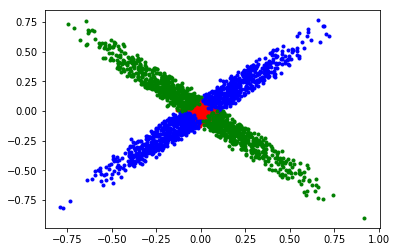

In [ ]:
#Generating the patterns
n = 3000 # of Patterns (multiple of 3)
patterns = np.zeros([n,5])
count = 0
i=[0,0,0,0]
i[0]=0
i[1]=int(n/3)
i[2]=int(2*n/3)
i[3]=int(n)
sd1=.25
sd2=.015
tr=.05
np.random.seed(123)

def cond(p1,p2,flag): 
    if flag==1: # Normal operating conditions
        return(abs(p1)<tr and abs(p2)<tr)
    elif flag==2: #Type 1 error
        return(abs(p1)>tr and abs(p2)<tr)
    elif flag==3: #Type 2 error
        return(abs(p1)<tr and abs(p2)>tr)


for pos,idx in enumerate(i):
    while count < idx:
        p1 = np.random.normal(0,sd1)
        p2 = np.random.normal(0,sd1)
        v1 = np.random.normal(0,sd2)
        v2 = np.random.normal(0,sd2)
        if cond(p1,p2,pos):
            patterns[count,0] = p1+p2+v1
            patterns[count,1] = p1-p2+v2
            patterns[count,pos+1] = 1
            count += 1
x_train = patterns[:,0:2]
y_train = patterns[:,2:]
np.random.seed(321)
shuff = np.arange(n)
np.random.shuffle(shuff)
x_shuffle = x_train[shuff]
y_shuffle = y_train[shuff]
plt.plot(x_train[i[0]:i[1],0],x_train[i[0]:i[1],1],'r.',
         x_train[i[1]:i[2],0],x_train[i[1]:i[2],1],'b.',
         x_train[i[2]:i[3],0],x_train[i[2]:i[3],1],'g.',)
plt.show()

In [18]:
%%time
np.random.seed(321)
model = Sequential()
model.add(Dense(units=5, activation='tanh', input_dim=2,name="l1"))
model.add(Dense(units=3, activation='tanh',name="l2"))
model.add(Dense(units=2, activation='tanh',name="l3"))
model.add(Dense(units=2, activation='tanh',name="l4"))
model.add(Dense(units=3, activation='softmax'))
from keras import optimizers
#sgd = optimizers.SGD(lr=0.1,decay=2.e-3)
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
callbacks = ModelCheckpoint('bestfit.hdf5',save_best_only=True)
history = model.fit(x_shuffle, y_shuffle, epochs=1000, batch_size=1,verbose=1,callbacks=[callbacks],validation_split=0.9)
loss_and_metrics = model.evaluate(x_train, y_train)
print(loss_and_metrics)
winsound.Beep(2500,200)

Train on 299 samples, validate on 2701 samples
Epoch 1/1000
299/299 [==============================] - 2s - loss: 1.1143 - acc: 0.3779 - val_loss: 1.1034 - val_acc: 0.3314
Epoch 2/1000
299/299 [==============================] - 2s - loss: 1.1069 - acc: 0.3813 - val_loss: 1.1005 - val_acc: 0.3595
Epoch 3/1000
299/299 [==============================] - 2s - loss: 1.1028 - acc: 0.3712 - val_loss: 1.0924 - val_acc: 0.3917
Epoch 4/1000
299/299 [==============================] - 2s - loss: 1.0974 - acc: 0.3545 - val_loss: 1.0917 - val_acc: 0.3547
Epoch 5/1000
299/299 [==============================] - 1s - loss: 1.0864 - acc: 0.4013 - val_loss: 1.1098 - val_acc: 0.3565
Epoch 6/1000
299/299 [==============================] - 2s - loss: 1.0920 - acc: 0.3612 - val_loss: 1.0832 - val_acc: 0.3447
Epoch 7/1000
299/299 [==============================] - 2s - loss: 1.0862 - acc: 0.3913 - val_loss: 1.0769 - val_acc: 0.5261
Epoch 8/1000
299/299 [==============================] - 2s - loss: 1.0799 - ac

299/299 [==============================] - 2s - loss: 0.7481 - acc: 0.6154 - val_loss: 0.7535 - val_acc: 0.6346
Epoch 66/1000
299/299 [==============================] - 1s - loss: 0.7561 - acc: 0.6254 - val_loss: 0.7822 - val_acc: 0.6127
Epoch 67/1000
299/299 [==============================] - 1s - loss: 0.7448 - acc: 0.6221 - val_loss: 0.7746 - val_acc: 0.6242
Epoch 68/1000
299/299 [==============================] - 1s - loss: 0.7562 - acc: 0.6087 - val_loss: 0.7587 - val_acc: 0.6301
Epoch 69/1000
299/299 [==============================] - 1s - loss: 0.7248 - acc: 0.6321 - val_loss: 0.7435 - val_acc: 0.6379
Epoch 70/1000
299/299 [==============================] - 2s - loss: 0.7452 - acc: 0.6221 - val_loss: 0.7672 - val_acc: 0.6279
Epoch 71/1000
299/299 [==============================] - 1s - loss: 0.7533 - acc: 0.6154 - val_loss: 0.7510 - val_acc: 0.6327
Epoch 72/1000
299/299 [==============================] - 1s - loss: 0.7579 - acc: 0.6087 - val_loss: 0.8365 - val_acc: 0.5835
Epoch 

299/299 [==============================] - 1s - loss: 0.7332 - acc: 0.6288 - val_loss: 0.7271 - val_acc: 0.6505
Epoch 130/1000
299/299 [==============================] - 1s - loss: 0.7561 - acc: 0.6221 - val_loss: 0.7517 - val_acc: 0.6335
Epoch 131/1000
299/299 [==============================] - 1s - loss: 0.7476 - acc: 0.6120 - val_loss: 0.8650 - val_acc: 0.5787
Epoch 132/1000
299/299 [==============================] - 2s - loss: 0.7372 - acc: 0.6254 - val_loss: 0.7770 - val_acc: 0.6124
Epoch 133/1000
299/299 [==============================] - 2s - loss: 0.7399 - acc: 0.6187 - val_loss: 0.7729 - val_acc: 0.6179
Epoch 134/1000
299/299 [==============================] - 2s - loss: 0.7217 - acc: 0.6388 - val_loss: 0.7312 - val_acc: 0.6446
Epoch 135/1000
299/299 [==============================] - 2s - loss: 0.7089 - acc: 0.6321 - val_loss: 0.7223 - val_acc: 0.6512
Epoch 136/1000
299/299 [==============================] - 2s - loss: 0.7366 - acc: 0.6254 - val_loss: 0.7268 - val_acc: 0.6486

299/299 [==============================] - 2s - loss: 0.7329 - acc: 0.6355 - val_loss: 0.7273 - val_acc: 0.6472
Epoch 194/1000
299/299 [==============================] - 2s - loss: 0.7400 - acc: 0.6355 - val_loss: 0.7414 - val_acc: 0.6401
Epoch 195/1000
299/299 [==============================] - 1s - loss: 0.7279 - acc: 0.6355 - val_loss: 0.7293 - val_acc: 0.6512
Epoch 196/1000
299/299 [==============================] - 1s - loss: 0.7228 - acc: 0.6355 - val_loss: 0.7316 - val_acc: 0.6486
Epoch 197/1000
299/299 [==============================] - 1s - loss: 0.7228 - acc: 0.6388 - val_loss: 0.7529 - val_acc: 0.6309
Epoch 198/1000
299/299 [==============================] - 1s - loss: 0.7327 - acc: 0.6288 - val_loss: 0.7542 - val_acc: 0.6357
Epoch 199/1000
299/299 [==============================] - 1s - loss: 0.7222 - acc: 0.6355 - val_loss: 0.7550 - val_acc: 0.6250
Epoch 200/1000
299/299 [==============================] - 1s - loss: 0.7288 - acc: 0.6421 - val_loss: 0.7562 - val_acc: 0.6246

299/299 [==============================] - 2s - loss: 0.7291 - acc: 0.6421 - val_loss: 0.7526 - val_acc: 0.63160.635
Epoch 258/1000
299/299 [==============================] - 2s - loss: 0.7137 - acc: 0.6321 - val_loss: 0.7337 - val_acc: 0.6420
Epoch 259/1000
299/299 [==============================] - 2s - loss: 0.7121 - acc: 0.6455 - val_loss: 0.7257 - val_acc: 0.6494
Epoch 260/1000
299/299 [==============================] - 2s - loss: 0.7241 - acc: 0.6421 - val_loss: 0.7276 - val_acc: 0.6512
Epoch 261/1000
299/299 [==============================] - 2s - loss: 0.7130 - acc: 0.6421 - val_loss: 0.7728 - val_acc: 0.6250
Epoch 262/1000
299/299 [==============================] - 2s - loss: 0.7147 - acc: 0.6355 - val_loss: 0.7545 - val_acc: 0.6305
Epoch 263/1000
299/299 [==============================] - 2s - loss: 0.7163 - acc: 0.6321 - val_loss: 0.7277 - val_acc: 0.6505
Epoch 264/1000
299/299 [==============================] - 2s - loss: 0.7150 - acc: 0.6355 - val_loss: 0.7278 - val_acc: 0

299/299 [==============================] - 2s - loss: 0.7145 - acc: 0.6388 - val_loss: 0.7387 - val_acc: 0.6457
Epoch 322/1000
299/299 [==============================] - 1s - loss: 0.7025 - acc: 0.6488 - val_loss: 0.7233 - val_acc: 0.6494
Epoch 323/1000
299/299 [==============================] - 2s - loss: 0.6998 - acc: 0.6555 - val_loss: 0.7702 - val_acc: 0.6287
Epoch 324/1000
299/299 [==============================] - 1s - loss: 0.7180 - acc: 0.6288 - val_loss: 0.7298 - val_acc: 0.6457
Epoch 325/1000
299/299 [==============================] - 2s - loss: 0.7112 - acc: 0.6421 - val_loss: 0.7216 - val_acc: 0.6509
Epoch 326/1000
299/299 [==============================] - 1s - loss: 0.7068 - acc: 0.6488 - val_loss: 0.7331 - val_acc: 0.6424
Epoch 327/1000
299/299 [==============================] - 1s - loss: 0.7211 - acc: 0.6355 - val_loss: 0.7475 - val_acc: 0.6327
Epoch 328/1000
299/299 [==============================] - 1s - loss: 0.7133 - acc: 0.6388 - val_loss: 0.7233 - val_acc: 0.6501

299/299 [==============================] - 1s - loss: 0.7120 - acc: 0.6455 - val_loss: 0.7448 - val_acc: 0.6390
Epoch 386/1000
299/299 [==============================] - 1s - loss: 0.7278 - acc: 0.6388 - val_loss: 0.7309 - val_acc: 0.6475
Epoch 387/1000
299/299 [==============================] - 1s - loss: 0.7116 - acc: 0.6421 - val_loss: 0.7484 - val_acc: 0.6398
Epoch 388/1000
299/299 [==============================] - 2s - loss: 0.7106 - acc: 0.6355 - val_loss: 0.7292 - val_acc: 0.6464
Epoch 389/1000
299/299 [==============================] - 1s - loss: 0.7172 - acc: 0.6421 - val_loss: 0.7270 - val_acc: 0.6505
Epoch 390/1000
299/299 [==============================] - 1s - loss: 0.7060 - acc: 0.6488 - val_loss: 0.7561 - val_acc: 0.6331
Epoch 391/1000
299/299 [==============================] - 1s - loss: 0.7193 - acc: 0.6488 - val_loss: 0.7334 - val_acc: 0.6438
Epoch 392/1000
299/299 [==============================] - 1s - loss: 0.7140 - acc: 0.6321 - val_loss: 0.7289 - val_acc: 0.6498

299/299 [==============================] - 1s - loss: 0.7159 - acc: 0.6421 - val_loss: 0.7249 - val_acc: 0.6520
Epoch 450/1000
299/299 [==============================] - 1s - loss: 0.7043 - acc: 0.6488 - val_loss: 0.7245 - val_acc: 0.6512
Epoch 451/1000
299/299 [==============================] - 1s - loss: 0.7001 - acc: 0.6522 - val_loss: 0.7389 - val_acc: 0.6383
Epoch 452/1000
299/299 [==============================] - 1s - loss: 0.7030 - acc: 0.6421 - val_loss: 0.7318 - val_acc: 0.6435
Epoch 453/1000
299/299 [==============================] - 1s - loss: 0.7086 - acc: 0.6455 - val_loss: 0.7245 - val_acc: 0.6531
Epoch 454/1000
299/299 [==============================] - 1s - loss: 0.7023 - acc: 0.6455 - val_loss: 0.7236 - val_acc: 0.6490
Epoch 455/1000
299/299 [==============================] - 2s - loss: 0.7070 - acc: 0.6388 - val_loss: 0.7349 - val_acc: 0.6475
Epoch 456/1000
299/299 [==============================] - 2s - loss: 0.7045 - acc: 0.6421 - val_loss: 0.7217 - val_acc: 0.6490

299/299 [==============================] - 2s - loss: 0.6897 - acc: 0.6522 - val_loss: 0.7171 - val_acc: 0.6420
Epoch 514/1000
299/299 [==============================] - 2s - loss: 0.6869 - acc: 0.6455 - val_loss: 0.7088 - val_acc: 0.6387
Epoch 515/1000
299/299 [==============================] - 2s - loss: 0.6930 - acc: 0.6756 - val_loss: 0.7353 - val_acc: 0.6316
Epoch 516/1000
299/299 [==============================] - 2s - loss: 0.6891 - acc: 0.6622 - val_loss: 0.7036 - val_acc: 0.6383
Epoch 517/1000
299/299 [==============================] - 2s - loss: 0.6877 - acc: 0.6421 - val_loss: 0.7149 - val_acc: 0.6705
Epoch 518/1000
299/299 [==============================] - 2s - loss: 0.6920 - acc: 0.6355 - val_loss: 0.7241 - val_acc: 0.6664
Epoch 519/1000
299/299 [==============================] - 2s - loss: 0.6791 - acc: 0.6455 - val_loss: 0.7304 - val_acc: 0.6594
Epoch 520/1000
299/299 [==============================] - 2s - loss: 0.6863 - acc: 0.6488 - val_loss: 0.6921 - val_acc: 0.6435

299/299 [==============================] - 2s - loss: 0.3513 - acc: 0.8595 - val_loss: 0.4643 - val_acc: 0.79670.83
Epoch 578/1000
299/299 [==============================] - 2s - loss: 0.3865 - acc: 0.8294 - val_loss: 0.4278 - val_acc: 0.8141
Epoch 579/1000
299/299 [==============================] - 2s - loss: 0.3811 - acc: 0.8328 - val_loss: 0.4197 - val_acc: 0.8308
Epoch 580/1000
299/299 [==============================] - 2s - loss: 0.3760 - acc: 0.8462 - val_loss: 0.4545 - val_acc: 0.82410.
Epoch 581/1000
299/299 [==============================] - 2s - loss: 0.3808 - acc: 0.8328 - val_loss: 0.4051 - val_acc: 0.82490.84
Epoch 582/1000
299/299 [==============================] - 2s - loss: 0.3893 - acc: 0.8395 - val_loss: 0.4542 - val_acc: 0.7949
Epoch 583/1000
299/299 [==============================] - 2s - loss: 0.3710 - acc: 0.8194 - val_loss: 0.4130 - val_acc: 0.8401
Epoch 584/1000
299/299 [==============================] - 2s - loss: 0.3580 - acc: 0.8562 - val_loss: 0.3963 - val_a

299/299 [==============================] - 1s - loss: 0.3330 - acc: 0.8763 - val_loss: 0.7528 - val_acc: 0.7305
Epoch 642/1000
299/299 [==============================] - 1s - loss: 0.3536 - acc: 0.8562 - val_loss: 0.4025 - val_acc: 0.8619
Epoch 643/1000
299/299 [==============================] - 1s - loss: 0.3507 - acc: 0.8729 - val_loss: 0.4202 - val_acc: 0.8675
Epoch 644/1000
299/299 [==============================] - 1s - loss: 0.3452 - acc: 0.8495 - val_loss: 0.4313 - val_acc: 0.8234
Epoch 645/1000
299/299 [==============================] - 1s - loss: 0.3708 - acc: 0.8763 - val_loss: 0.4434 - val_acc: 0.8056
Epoch 646/1000
299/299 [==============================] - 1s - loss: 0.3878 - acc: 0.8763 - val_loss: 0.4837 - val_acc: 0.8241
Epoch 647/1000
299/299 [==============================] - 1s - loss: 0.3385 - acc: 0.8696 - val_loss: 0.4003 - val_acc: 0.8330
Epoch 648/1000
299/299 [==============================] - 2s - loss: 0.3851 - acc: 0.8462 - val_loss: 0.4197 - val_acc: 0.8441

299/299 [==============================] - 3s - loss: 0.3699 - acc: 0.8595 - val_loss: 0.4070 - val_acc: 0.8804
Epoch 706/1000
299/299 [==============================] - 2s - loss: 0.3576 - acc: 0.8629 - val_loss: 0.4418 - val_acc: 0.8526
Epoch 707/1000
299/299 [==============================] - 2s - loss: 0.3262 - acc: 0.8562 - val_loss: 0.5811 - val_acc: 0.7760
Epoch 708/1000
299/299 [==============================] - 2s - loss: 0.3670 - acc: 0.8863 - val_loss: 0.3802 - val_acc: 0.8797
Epoch 709/1000
299/299 [==============================] - 2s - loss: 0.3577 - acc: 0.8696 - val_loss: 0.4119 - val_acc: 0.8808
Epoch 710/1000
299/299 [==============================] - 2s - loss: 0.3417 - acc: 0.8595 - val_loss: 0.3995 - val_acc: 0.8782
Epoch 711/1000
299/299 [==============================] - 2s - loss: 0.3150 - acc: 0.8729 - val_loss: 0.4243 - val_acc: 0.8830
Epoch 712/1000
299/299 [==============================] - 2s - loss: 0.3354 - acc: 0.8763 - val_loss: 0.5051 - val_acc: 0.8634

299/299 [==============================] - 2s - loss: 0.3474 - acc: 0.8863 - val_loss: 0.5141 - val_acc: 0.7638
Epoch 770/1000
299/299 [==============================] - 2s - loss: 0.3254 - acc: 0.8930 - val_loss: 0.5483 - val_acc: 0.8760
Epoch 771/1000
299/299 [==============================] - 2s - loss: 0.3644 - acc: 0.8829 - val_loss: 0.4324 - val_acc: 0.8786
Epoch 772/1000
299/299 [==============================] - 2s - loss: 0.3383 - acc: 0.8963 - val_loss: 0.6010 - val_acc: 0.7482
Epoch 773/1000
299/299 [==============================] - 2s - loss: 0.3410 - acc: 0.8763 - val_loss: 0.4567 - val_acc: 0.8963
Epoch 774/1000
299/299 [==============================] - 3s - loss: 0.3529 - acc: 0.8896 - val_loss: 0.4337 - val_acc: 0.8871
Epoch 775/1000
299/299 [==============================] - 3s - loss: 0.4218 - acc: 0.8662 - val_loss: 0.5986 - val_acc: 0.8563
Epoch 776/1000
299/299 [==============================] - 2s - loss: 0.3195 - acc: 0.8829 - val_loss: 0.5331 - val_acc: 0.8693

299/299 [==============================] - 2s - loss: 0.3185 - acc: 0.9231 - val_loss: 0.4383 - val_acc: 0.8934
Epoch 834/1000
299/299 [==============================] - 2s - loss: 0.3462 - acc: 0.8896 - val_loss: 0.3872 - val_acc: 0.8941
Epoch 835/1000
299/299 [==============================] - 2s - loss: 0.3644 - acc: 0.8829 - val_loss: 0.4825 - val_acc: 0.7864
Epoch 836/1000
299/299 [==============================] - 2s - loss: 0.3121 - acc: 0.8930 - val_loss: 0.3965 - val_acc: 0.9023
Epoch 837/1000
299/299 [==============================] - 1s - loss: 0.2732 - acc: 0.8896 - val_loss: 0.5797 - val_acc: 0.8897
Epoch 838/1000
299/299 [==============================] - 2s - loss: 0.3442 - acc: 0.8896 - val_loss: 0.4711 - val_acc: 0.8926
Epoch 839/1000
299/299 [==============================] - 1s - loss: 0.3246 - acc: 0.9097 - val_loss: 0.4247 - val_acc: 0.8934
Epoch 840/1000
299/299 [==============================] - 1s - loss: 0.2800 - acc: 0.9097 - val_loss: 0.4549 - val_acc: 0.8882

299/299 [==============================] - 2s - loss: 0.3060 - acc: 0.8930 - val_loss: 0.4362 - val_acc: 0.8900
Epoch 898/1000
299/299 [==============================] - 1s - loss: 0.3427 - acc: 0.9030 - val_loss: 0.6598 - val_acc: 0.76230.897 - ETA: 0s - loss: 0.3721 - acc: 0.89
Epoch 899/1000
299/299 [==============================] - 1s - loss: 0.3266 - acc: 0.8930 - val_loss: 0.4834 - val_acc: 0.7793
Epoch 900/1000
299/299 [==============================] - 2s - loss: 0.2836 - acc: 0.9130 - val_loss: 0.4460 - val_acc: 0.9082
Epoch 901/1000
299/299 [==============================] - 2s - loss: 0.3087 - acc: 0.9130 - val_loss: 0.5024 - val_acc: 0.8849
Epoch 902/1000
299/299 [==============================] - 2s - loss: 0.3219 - acc: 0.8930 - val_loss: 0.6840 - val_acc: 0.8427
Epoch 903/1000
299/299 [==============================] - 2s - loss: 0.3160 - acc: 0.9130 - val_loss: 0.4275 - val_acc: 0.8978
Epoch 904/1000
299/299 [==============================] - 2s - loss: 0.2495 - acc: 0

299/299 [==============================] - 2s - loss: 0.2635 - acc: 0.9097 - val_loss: 0.4159 - val_acc: 0.9030
Epoch 962/1000
299/299 [==============================] - 2s - loss: 0.3010 - acc: 0.8863 - val_loss: 0.5645 - val_acc: 0.7716
Epoch 963/1000
299/299 [==============================] - 2s - loss: 0.3501 - acc: 0.9030 - val_loss: 0.4723 - val_acc: 0.8863
Epoch 964/1000
299/299 [==============================] - 2s - loss: 0.3063 - acc: 0.8896 - val_loss: 0.3858 - val_acc: 0.9111
Epoch 965/1000
299/299 [==============================] - 2s - loss: 0.3311 - acc: 0.8963 - val_loss: 0.4157 - val_acc: 0.9108
Epoch 966/1000
299/299 [==============================] - 2s - loss: 0.3630 - acc: 0.8896 - val_loss: 0.4301 - val_acc: 0.8926
Epoch 967/1000
299/299 [==============================] - 2s - loss: 0.2910 - acc: 0.9197 - val_loss: 0.3947 - val_acc: 0.9108
Epoch 968/1000
299/299 [==============================] - 2s - loss: 0.2764 - acc: 0.9030 - val_loss: 0.4079 - val_acc: 0.9074

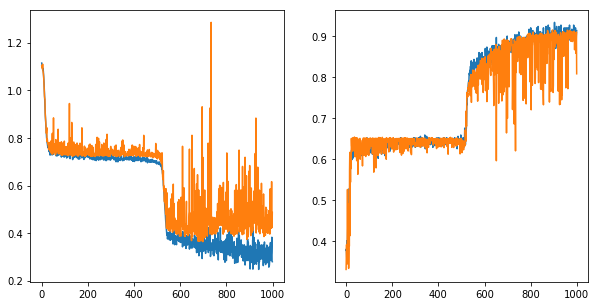

In [19]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax2.plot(history.history['acc'])
ax2.plot(history.history['val_acc'])
plt.show()

In [20]:
modeltemp = load_model('bestfit.hdf5')
modeltemp.evaluate(x_train,y_train)

2208/3000 [=====================>........] - ETA: 0s

[0.35461576962471009, 0.89366666650772097]

In [21]:
swap = model
model = modeltemp
modeltemp = swap
inter1 = Model(inputs=model.input, outputs=model.get_layer('l1').output)
inter2 = Model(inputs=model.input, outputs=model.get_layer('l2').output)
inter3 = Model(inputs=model.input, outputs=model.get_layer('l3').output)
inter4 = Model(inputs=model.input, outputs=model.get_layer('l4').output)
interout1 = inter1.predict(x_train)
interout2 = inter2.predict(x_train)
interout3 = inter3.predict(x_train)
interout4 = inter4.predict(x_train)

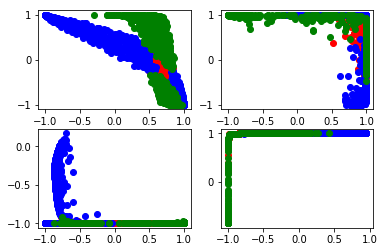

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.plot(interout1[i[0]:i[1],1],interout1[i[0]:i[1],0],'ro',
         interout1[i[1]:i[2],1],interout1[i[1]:i[2],0],'bo',
         interout1[i[2]:i[3],1],interout1[i[2]:i[3],0],'go')
ax2.plot(interout2[i[0]:i[1],1],interout2[i[0]:i[1],0],'ro',
         interout2[i[1]:i[2],1],interout2[i[1]:i[2],0],'bo',
         interout2[i[2]:i[3],1],interout2[i[2]:i[3],0],'go')
ax3.plot(interout3[i[0]:i[1],1],interout3[i[0]:i[1],0],'ro',
         interout3[i[1]:i[2],1],interout3[i[1]:i[2],0],'bo',
         interout3[i[2]:i[3],1],interout3[i[2]:i[3],0],'go')
ax4.plot(interout4[i[0]:i[1],1],interout4[i[0]:i[1],0],'ro',
         interout4[i[1]:i[2],1],interout4[i[1]:i[2],0],'bo',
         interout4[i[2]:i[3],1],interout4[i[2]:i[3],0],'go')
plt.show()

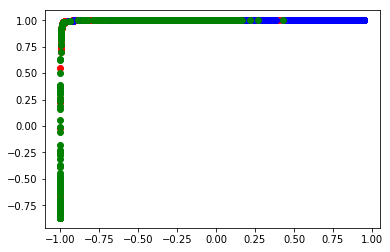

In [23]:
plt.plot(interout4[i[0]:i[1],1],interout4[i[0]:i[1],0],'ro',
         interout4[i[1]:i[2],1],interout4[i[1]:i[2],0],'bo',
         interout4[i[2]:i[3],1],interout4[i[2]:i[3],0],'go')
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_train)
confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred,axis=1))

array([[858,  26, 116],
       [ 20, 946,  34],
       [113,  10, 877]], dtype=int64)